In [ ]:
## KÜTÜPHANELER -- CRISP METODOLOJİ İLE 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
### VERİ YÜKLEME
data = pd.read_csv("eksikveriler.csv", delimiter=',')

In [ ]:
data[["boy"]] # çift parantez aslında frame sağlar. 

In [ ]:
data[["boy","kilo"]] # çift parantez aslında frame sağlar. 

In [ ]:
##EKSİK VERİLER 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Yas = data.iloc[:,1:4].values
print(Yas)
imputer = imputer.fit(Yas[:,1:4])
Yas[:,1:4] = imputer.transform(Yas[:,1:4])
print(Yas)


In [ ]:
#KATEGORİK VERİLER 
ulke = data.iloc[:,0:1].values
print(ulke)

from sklearn import preprocessing
le = preprocessing.LabelEncoder() #ordinal için uygun bir encoding ama nominal yani ülke için değil
ulke[:,0] = le.fit_transform(data.iloc[:,0])
ulke


In [ ]:
ohe = preprocessing.OneHotEncoder() # kateogirk veriyi özellikle (ordinal birebir sayısı 0 1 2 diye çevirebilirken, nominalde özellikleri encoding yapılmalı)
ulke = ohe.fit_transform(ulke).toarray()
print(ulke)





In [ ]:
## Dataframe şeklinde veriyi birleştirme
print(list(range(22)))
sonuc = pd.DataFrame(data=ulke, index = range(22), columns = ['fr','tr','us'])
print(sonuc)

sonuc2 = pd.DataFrame(data=Yas, index = range(22), columns = ['boy','kilo','yas'])
print(sonuc2)

cinsiyet = data.iloc[:,-1].values
print(cinsiyet)

sex = pd.DataFrame(data = cinsiyet, index = range(22), columns = ['cinsiyet'])
print(sex)

s=pd.concat([sonuc,sonuc2], axis=1) #axis row değilde kolon olarak eklesin 
print(s)

s2=pd.concat([s,sex], axis=1)
print(s2)




In [ ]:
#veriyi 4 parça da train ve test bölme
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(s,sex,test_size=0.33, random_state=0)

In [ ]:
#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)



In [ ]:
####ŞABLON PROCESSING İÇİn
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2.veri onisleme
#2.1.veri yukleme
veriler = pd.read_csv('satislar.csv')


#test
print(veriler)
#veri on isleme

aylar = veriler[['Aylar']]
print(aylar)

satislar = veriler[['Satislar']]
print(satislar)

satislar2 = veriler.iloc[:,:1].values
print(satislar2)

#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(aylar,satislar,test_size=0.33, random_state=0)

#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)



In [ ]:
## ML ALGORİTMALARI 

## PREDICTION : SAYISAL VERİLERİN TAHMİNİDİR !!!

from sklearn.linear_model import LinearRegression
lgr = LinearRegression()
lgr.fit(X_train,y_train) # x trainden y traini öğrenmesi 


y_pred = lgr.predict(X_test) # x testten y_testi verebilecekmi ?
print(y_pred)
print(y_test)
 


In [ ]:
x_train = x_train.sort_index()
y_train = y_train.sort_index()

plt.plot(x_train,y_train)
plt.plot(x_test,lgr.predict(x_test))

plt.title("aylara göre satış")
plt.xlabel("Aylar")
plt.ylabel("Satışlar")



# ÇOKLU DEĞİŞKEN REGRESYON 

In [ ]:
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2.veri onisleme
#2.1.veri yukleme
veriler = pd.read_csv('veriler.csv')
#pd.read_csv("veriler.csv")
#test
print(veriler)
Yas = veriler.iloc[:,1:4].values
print(Yas)

#encoder: Kategorik -> Numeric
ulke = veriler.iloc[:,0:1].values
print(ulke)

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

ulke[:,0] = le.fit_transform(veriler.iloc[:,0])

print(ulke)

ohe = preprocessing.OneHotEncoder()
ulke = ohe.fit_transform(ulke).toarray()
print(ulke)

#encoder: Kategorik -> Numeric
c = veriler.iloc[:,-1:].values
print(c)


from sklearn import preprocessing

le = preprocessing.LabelEncoder()
c[:,-1] = le.fit_transform(veriler.iloc[:,-1])
print(c)


#numpy dizileri dataframe donusumu
sonuc = pd.DataFrame(data=ulke, index = range(22), columns = ['fr','tr','us'])
print(sonuc)

sonuc2 = pd.DataFrame(data=Yas, index = range(22), columns = ['boy','kilo','yas'])
print(sonuc2)

cinsiyet = veriler.iloc[:,-1].values
print(cinsiyet)

sonuc3 = pd.DataFrame(data = c[:,:1], index = range(22), columns = ['cinsiyet'])
print(sonuc3)


#dataframe birlestirme islemi
s=pd.concat([sonuc,sonuc2], axis=1)
print(s)

s2=pd.concat([s,sonuc3], axis=1)
print(s2)

#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(s,sonuc3,test_size=0.33, random_state=0)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

boy = s2.iloc[:,3:4].values
print(boy)
sol = s2.iloc[:,:3]
sag = s2.iloc[:,4:]

veri = pd.concat([sol,sag],axis=1)

x_train, x_test,y_train,y_test = train_test_split(veri,boy,test_size=0.33, random_state=0)


r2 = LinearRegression()
r2.fit(x_train,y_train)

y_pred = r2.predict(x_test)




Dummy variable tuzağı, bir makine öğrenmesi modelinde aynı bilgiyi temsil eden iki veya daha fazla değişkenin kullanılmasıdır. Bu durum, modelin aşırı uyuma neden olabilir ve sonuçta doğruluk oranını düşürebilir.

Örneğin, bir ev fiyatlarını tahmin etmek için makine öğrenmesi modeli oluşturuyorsanız, evlerin yerleşim yerlerini temsil etmek için bir dizi dummy değişken kullanabilirsiniz. Ancak, tüm yerleşim yerleri için bir dummy değişken oluşturduysanız, bu değişkenler arasında çok yüksek bir korelasyon olabilir.

------------------------------------
p değeri (p-value), istatistiksel hipotez testlerinde kullanılan bir ölçüttür. Makine öğrenimi uygulamalarında, p değeri, bir modelin performansının belirlenmesinde kullanılabilir.

Örneğin, bir sınıflandırma modeli oluşturmak istediğinizi varsayalım. Verilerinizi eğitirken, modelin doğruluğunu ölçmek için bir doğruluk oranı (accuracy) kullanabilirsiniz. Ancak, doğruluk oranı yalnızca modelin doğruluğunu ölçer ve bir modelin gerçekte ne kadar iyi olduğunu belirlemek için yeterli değildir.

Bu nedenle, modelin doğruluğunu belirlemek için p değerini kullanabilirsiniz. P değeri, modelin tahminlerinin tesadüfi olup olmadığını ölçer. Bir hipotez testi yaptığınızda, hipoteziniz doğru olduğunda bir p değeri elde edersiniz. Daha düşük bir p değeri, hipoteziniz doğru olduğunda daha az olasıdır ve bu nedenle, modelin performansı daha iyi olarak kabul edilir.

Ancak, p değeri yalnızca modelin performansını ölçmek için kullanılan bir ölçüttür. Diğer faktörler, örneğin verilerin kalitesi, modelin uygunluğu ve makine öğrenimi algoritmalarının seçimi gibi faktörler de önemlidir ve bir modelin performansını etkileyebilir.

In [ ]:
import statsmodels.api as sm


## burada geri eleme ile variable önemliliği
X = np.append(arr = np.ones((22,1)).astype(int), values=veri, axis=1)

X_l = veri.iloc[:,[0,1,2,3,4,5]].values
X_l = np.array(X_l,dtype=float)
model = sm.OLS(boy,X_l).fit()
print(model.summary())


X_l = veri.iloc[:,[0,1,2,3,5]].values
X_l = np.array(X_l,dtype=float)
model = sm.OLS(boy,X_l).fit()
print(model.summary())



X_l = veri.iloc[:,[0,1,2,3]].values
X_l = np.array(X_l,dtype=float)
model = sm.OLS(boy,X_l).fit()
print(model.summary())




Statsmodels, Python programlama dili için bir istatistiksel modelleme kütüphanesidir. Bu kütüphane, istatistiksel testler, doğrusal regresyon, zaman serisi analizi, panel veri analizi, doğrusal karışık etkiler modeli (linear mixed effects model), genelleştirilmiş doğrusal modeller (GLM), ağaç tabanlı modeller ve daha birçok istatistiksel yöntemi içermektedir.

Statsmodels, veri analizindeki çeşitli adımlarda kullanılabilir. Veri ön işleme adımlarından başlayarak veri keşfi, model seçimi, model uyumu ve sonuçların yorumlanması aşamalarında kullanılabilir. Statsmodels, özellikle akademik ve araştırma çalışmalarında kullanılan yaygın bir araçtır.

Statsmodels, NumPy, SciPy, Pandas ve Matplotlib kütüphaneleri gibi diğer Python bilimsel hesaplama kütüphaneleriyle birlikte kullanılabilir ve Python veri bilimi ekosisteminin önemli bir parçasıdır.

# ÖDEV - REGRESYON MODELİ - MULTIPLE 

In [ ]:
#1. kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 

import warnings
warnings.filterwarnings("ignore")

#2. Veri Onisleme

#2.1. Veri Yukleme
data = pd.read_csv('odev_tenis.csv')
print(data)

#veri on isleme

#### Target attribute olan yes no kolonunu regresyon numeric içerdiğinden label encoding yapalım
playAttribute = data.iloc[:,-1:].values #playAttribute = data[["play"]]
le = preprocessing.LabelEncoder()
play = le.fit_transform(playAttribute) ## artık 0 ve 1 den yes/no
print(play)

#### outlook ve windy için 0 1 encoding ile attribute çoğaltalım. 
outlookAttribute = data[["outlook"]]
print(outlookAttribute)
ohe = preprocessing.OneHotEncoder()
outlook = ohe.fit_transform(outlookAttribute).toarray()
print(outlook)

windyAttribute = data[["windy"]]
print(windyAttribute)
windy = le.fit_transform(windyAttribute) 
print(windy)



outlook = pd.DataFrame(data = outlook, index = range(14), columns=['overcast','rainy','sunny'])
play = pd.DataFrame(data = play, columns = ["PLAY"]) 
windy = pd.DataFrame(data = windy, columns=["windy"])

 
data_ = pd.concat([outlook,play],axis = 1)
data_ = pd.concat([windy,data_], axis = 1)
data =  pd.concat([data_,data.iloc[:,1:3]], axis = 1)
print(data)



#verilerin egitim ve test icin bolunmesi
x_train, x_test,y_train,y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1:],test_size=0.33, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
print("Tahmin edilen y_pred:")
print(y_pred)
print("Aslında olan y_test :")
print(y_test)

#ACABA ATTRIBUTE AZALTARAK ELİMİNE YAPILABİLİR Mİ 
#backward elimination 
X = np.append(arr = np.ones((14,1)).astype(int), values=data.iloc[:,:-1], axis=1 )
X_l = data.iloc[:,[0,1,2,3,4,5]].values # almak istenen kolonlar (target att hariç)
r_ols = sm.OLS(endog = data.iloc[:,-1:], exog =X_l)
r = r_ols.fit()
print(r.summary())

##çıkan sonuçlarda p-value x1 en yüksek ve sistemden bunu atalım.


data = data.iloc[:,1:] ## x1 yani ilk kolonu atalım

X = np.append(arr = np.ones((14,1)).astype(int), values=data.iloc[:,:-1], axis=1 )
X_l = data.iloc[:,[0,1,2,3,4]].values
r_ols = sm.OLS(endog = data.iloc[:,-1:], exog =X_l)
r = r_ols.fit()
print(r.summary())

## artık p value düştü ama diğerleri de cok yüksek 0.05 ideali fakat

#sistemi yeni haliyle eğitmek gerekecek.
x_train = x_train.iloc[:,1:]
x_test = x_test.iloc[:,1:]

regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
print("Tahmin edilen y_pred:")
print(y_pred)
print("Aslında olan y_test :")
print(y_test)

#backward elimi sonrası öncesine göre artık x1 i attığımızdan sistem iyileşmiş bunu cıktıların y predleri karşılaştırabilir 
 
data = data.iloc[:,1:]  ## x1 yani ilk kolonu atalım

X = np.append(arr = np.ones((14,1)).astype(int), values=data.iloc[:,:-1], axis=1 )
X_l = data.iloc[:,[0,1,2,3,4]].values
r_ols = sm.OLS(endog = data.iloc[:,-1:], exog =X_l)
r = r_ols.fit()
print(r.summary())

x_train = x_train.iloc[:,1:]
x_test = x_test.iloc[:,1:]

regressor.fit(x_train,y_train)


y_pred = regressor.predict(x_test)
print("Tahmin edilen y_pred:")
print(y_pred)
print("Aslında olan y_test :")
print(y_test)
#görüldüğü gibi elim sonrası sistem iyileştir y_pred farklarından görülebilirç. 

# POLYNOMIAL REGRESSION


Polinomal regresyon, veriler arasındaki ilişkiyi temsil etmek için polinom adı verilen matematiksel bir fonksiyon kullanarak gerçekleştirilen bir regresyon tekniğidir. Lineer regresyonun bir türü olarak düşünülebilir, ancak lineer regresyon, doğrusal bir model kullanarak veriler arasındaki ilişkiyi temsil ederken, polinomal regresyon bir polinom kullanarak daha yüksek dereceli, daha karmaşık ilişkileri modelleyebilir.

Polinomal regresyon, veri kümesindeki noktaların eğilim çizgisini belirlemek amacıyla kullanılır. Veri kümesindeki noktaların model azaltması yapılması veya veri kümesinin doğrusal bir modelle uyumlu olmaması durumunda polinomal regresyon kullanılmaktadır. Önceden bilinmeyen bir x değeri verildiğinde, polinomal regresyon, x değerine karşılık gelen bir y tahmini üretebilir. Polinomal regresyon, özellikle veri noktaları arasında doğrusal olmayan bir ilişki olduğu durumlarda oldukça etkilidir.

Sonuç olarak, polinomal regresyon, karmaşık veri setlerindeki eğilimleri analiz etmek için kullanışlı bir tekniktir. Fonksiyonun derecesi doğru seçildiğinde, bu regresyon tekniği, veriler arasındaki doğrusal olmayan ilişkileri modeller ve gelecekteki davranışları tahmin etmek için kullanılabilir. Ancak, polinomal regresyon kullanırken, modelin aşırı öğrenmeye yol açmaması için dikkatli olunması önemlidir. Overfitting (aşırı uyum) durumunda polinomal regresyon doğruluğu düşürebilir veya hatalı tahminlere yol açabilir.

POL REGRESYON ŞABLONU : 

In [ ]:
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# veri yukleme
data = pd.read_csv('maaslar.csv')

print(data)
#DATAFRAME DİLİMLERİ (SLICE)
x = data.iloc[:,1:2] #eğitim kolonu aldık
y = data.iloc[:,2:] #maaş kolonu 
 
#Numpy array dönüşümü
X = x.values
Y = y.values

#KATEGRİK VERİLERİN DÖNÜŞÜMÜ UNVAN DA YAPILACAK FAKAT EĞİTİM SEVİYESİ NUMERIC  VERİLDİĞİNDEN GEREK YOK 

#linear regression (DOĞRUSAL REGRESYON) -- deneme halini görelim bi lineer ilişki de 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() 
lin_reg.fit(X,Y)
#Görselleştirme 
plt.scatter(X,Y,color='red')
plt.plot(x,lin_reg.predict(X), color = 'blue')  ##her bir x e karşılık 
plt.show()

####################################### Görüldüğü gibi lineer değil polimial artış var 


#polynomial regression (DOĞRUSAL OLMAYAB MODEL) === MULTIPLE NON-LINEAR REGRESSION GİBİ DÜŞÜNÜLEBİLİR 

#2.dereceden polinom
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
#Görselleştirme 
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()

#4.dereceden polinom
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg3 = LinearRegression()
lin_reg3.fit(x_poly,y)
#Görselleştirme 
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg3.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()

#tahminler: girdiler eğitim seviyesi - cıktı maas 

print("------------------------------- LINEAR")
print(lin_reg.predict([[6.6]])) #lineerde uygun bir model olmadığı belli doğrusal artış var 
print(lin_reg.predict([[11]]))
print("------------------------------- POLY")
print(lin_reg3.predict(poly_reg.fit_transform([[6.6]])))
print(lin_reg3.predict(poly_reg.fit_transform([[11]])))


# SUPPORT VECTOR MACHINE/REGRESSION
### REGRESYON İÇİN SVR DENENEBİLİR 
Destek Vektör Regresyonu (SVR), veri noktaları arasındaki ilişkileri inceleyen ve tahmin yürüten bir makine öğrenmesi algoritmasıdır. SVR daha spesifik olarak regresyon problemlerinde uygulanır ve özellikle yüksek boyutlu örneklem verilerini işleme konusunda oldukça etkilidir.

SVR, sınıflandırma problemlerinde kullanılan destek vektör makinelerinin (SVM) regresyon sürümüdür. SVM sınıflandırma problemlerinde kullanılırken, SVR regresyon problemlerinde kullanılır. SVR, doğrusal veya doğrusal olmayan veri kümeleri için farklı çekirdekler kullanarak başarılı sonuçlar verebilir.


Özetle, SVR, gürültülü olduğu bilinen veri kümelerinde veya doğrusal olmayan ilişkileri modellememiz gerektiğinde kullanılır. SVR, yüksek boyutlu veri kümelerinde yararlıdır ve farklı çekirdekler kullanarak, birçok farklı problemin çözümü için uyarlanabilen bir tekniktir.


Gürültülü veri, ölçümlerde veya veri toplama işlemindeki hatalar, rastgele varyasyonlar veya diğer dış etkenler nedeniyle veri setlerindeki istenmeyen anlamsız veya yanıltıcı verilerdir. Bu istenmeyen veriler, veri analizi ve makine öğrenmesinde yüksek doğruluğa ve güvenilirliğe ihtiyaç duyulan problemleri çözmekte zorluk yaratabilir.

------------------------------
SVR ŞABLON 

In [ ]:
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# veri yukleme
data = pd.read_csv('maaslar.csv')

print(data)
#DATAFRAME DİLİMLERİ (SLICE)
x = data.iloc[:,1:2] #eğitim kolonu aldık
y = data.iloc[:,2:] #maaş kolonu 
 
#Numpy array dönüşümü
X = x.values
Y = y.values

#VERİLERİN ÖLÇEKLENMESİ : SVM KULLANIRKEN SCALER KULLANIM ZORUNLULUĞU VARDIR. HASSASTIR. 

#VERİLERİN ÖN İŞLEMESİ ŞABLONUNDAN ALINABİLİR......
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
x_olcekli = sc1.fit_transform(X)
sc2=StandardScaler()
y_olcekli = sc2.fit_transform(Y)


from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)

plt.scatter(x_olcekli,y_olcekli,color='red')
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color='blue')


print(svr_reg.predict([[11]]))
print(svr_reg.predict([[6.6]]))

# DECISION TREE - REGRESYON(TAHMİN)
Karar ağaçları, regresyon problemlerinde de kullanılabilir. Regresyon, bir bağımlı değişkenin bir veya daha fazla bağımsız değişkene bağlı olduğu bir veri analizi yöntemidir.

Karar ağaçları, verileri ağaç benzeri bir yapıya ayırarak bir dizi karar aşamasından geçirir. Bu karar aşamaları, her bir düğümde bir test olarak uygulanır ve her test sonucunda, veriler sol veya sağ düğüme yönlendirilir. Sonuç olarak, her veri noktası son düğüme kadar ilerler ve bu düğümdeki çıktı değeri, tahmin edilen regresyon sonucunu verir.

Karar ağaçları, regresyon problemlerinde kullanılmasının yanı sıra, sınıflandırma problemlerinde de yaygın olarak kullanılır. Regresyon problemleri için kullanılan karar ağaçları, ağacın dallarının her birine bir sayısal değer atar ve bu sayısal değerlerin ortalaması, her bir son düğüm için tahmini regresyon sonucunu verir.

Karar ağaçları, verilerin ilişkilerini keşfetmek için kullanılan etkili bir yöntemdir ve özellikle büyük veri kümeleri üzerinde iyi performans gösterir. Ancak, ağacın aşırı uyum yapmasına karşı dikkatli olunmalıdır. Aşırı uyum, ağacın eğitim verilerine çok sıkı bir şekilde uymasına neden olabilir, ancak yeni verilerde daha kötü performans göstermesine neden olabilir. Bu nedenle, modelin doğruluğunu artırmak için, ağacın derinliği veya dallanma kriterlerinin uygun şekilde ayarlanması gerekebilir.

----------------------
DECISION TREE - REGRESYON ŞABLON




In [ ]:
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# veri yukleme
data = pd.read_csv('maaslar.csv')

print(data)
#DATAFRAME DİLİMLERİ (SLICE)
x = data.iloc[:,1:2] #eğitim kolonu aldık
y = data.iloc[:,2:] #maaş kolonu 
 
#Numpy array dönüşümü
X = x.values
Y = y.values

#ÖLÇEKLENMEYE GEREK YOK KARAR AĞAÇLARINDA------------

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X,Y)
Z = X + 0.5
K = X - 0.4
plt.scatter(X,Y, color='red')
plt.plot(x,dtr.predict(X), color='blue')

plt.plot(x,dtr.predict(Z),color='green')
plt.plot(x,dtr.predict(K),color='yellow')

print(r_dt.predict([[11]]))
print(r_dt.predict([[6.6]]))


# Görüldüğü gibi sabitledi dezavantaj.. !!!!!


# RANDOM FOREST - REGRESYON 
Random forest, regresyon problemlerinde de kullanılabilir. Regresyon, bir bağımlı değişkenin bir veya daha fazla bağımsız değişkene bağlı olduğu bir veri analizi yöntemidir.

Random forest, birden fazla karar ağacının bir araya gelmesiyle oluşan bir ensemble modelidir. Her bir karar ağacı, rastgele olarak örneklenmiş veri örnekleri ve özellikler üzerinde eğitilir. Bu, her bir karar ağacının farklı bir alt kümesini görmesine ve böylece genel olarak daha iyi bir performans göstermesine olanak tanır.

Regresyon problemleri için kullanılan random forest, ağaçların her bir son düğümüne sayısal bir değer atar ve bu değerlerin ortalaması, tahmini regresyon sonucunu verir. Random forest, aynı zamanda, özelliklerin önem sıralamasını da sağlayarak, hangi özelliklerin regresyon sonucunu tahmin etmek için daha önemli olduğunu belirleyebilir.

Random forest, verilerin ilişkilerini keşfetmek için kullanılan etkili bir yöntemdir ve özellikle büyük veri kümeleri üzerinde iyi performans gösterir. Ayrıca, aşırı uyum riskini azaltarak, modelin genelleme performansını artırabilir. Ancak, modelin daha karmaşık olduğu için, eğitim süresi daha uzun olabilir ve modele ait kararların yorumlanması daha zor olabilir.


ORTALAMA ALINIR ÇOĞUNLUKTA REGRESYONDA FAKAT SINIFLANDIRMADA MAJORITY VOTE ALIR ..

---------------- 
Ensemble learning === KOLLEKTİF ÖĞRENME
----------------
Ensemble learning, bir dizi öğrenme algoritmasını bir araya getirerek daha iyi bir performans elde etmeyi amaçlayan bir makine öğrenimi tekniklerinden biridir. Ensemble learning yöntemleri, tek başına kullanılan bir öğrenme algoritmasından daha iyi sonuçlar üretmek için birden fazla öğrenme algoritması kombinasyonlarını kullanır.

Ensemble learning, birden fazla öğrenme algoritmasının çıktılarını birleştirerek, daha doğru ve kararlı bir sonuç elde etmeyi amaçlar. Ensemble learning yöntemleri genellikle iki kategoriye ayrılır: bagging ve boosting.

Bagging, bootstrap aggregating olarak da bilinir ve veri kümesinin rastgele örneklem alınarak birden fazla öğrenme algoritması üzerinde eğitilmesi ve sonuçlarının bir araya getirilmesi işlemidir.

Boosting ise, zayıf öğrenicilerin (weak learner) bir araya gelerek güçlü bir öğrenici (strong learner) oluşturması işlemidir. Boosting, zayıf öğrenicilerin bir araya gelerek hataları düzeltmesi ve daha doğru sonuçlar üretmesi için iteratif olarak çalışır.

Ensemble learning, tek başına kullanılan bir öğrenme algoritmasına göre daha yüksek performans ve daha düşük hata oranları sağlar. Ensemble learning yöntemleri, sınıflandırma, regresyon ve özellik seçimi gibi birçok makine öğrenimi görevinde kullanılır.

              unvan  Egitim Seviyesi   maas
0             Cayci                1   2250
1          Sekreter                2   2500
2  Uzman Yardimcisi                3   3000
3             Uzman                4   4000
4  Proje Yoneticisi                5   5500
5               Sef                6   7500
6             Mudur                7  10000
7          Direktor                8  15000
8           C-level                9  25000
9               CEO               10  50000
[10500.]


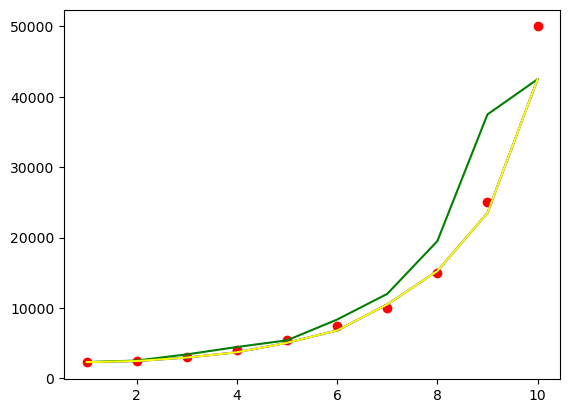

Random Forest R2 degeri
0.9704434230386582
0.9704434230386582
0.8820523231127324


In [3]:
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics  import r2_score
import warnings
warnings.filterwarnings("ignore")

# veri yukleme
data = pd.read_csv('maaslar.csv')

print(data)
#DATAFRAME DİLİMLERİ (SLICE)
x = data.iloc[:,1:2] #eğitim kolonu aldık
y = data.iloc[:,2:] #maaş kolonu 
 
#Numpy array dönüşümü
X = x.values
Y = y.values


from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())
Z = X + 0.5
K = X - 0.4
print(rf_reg.predict([[6.6]]))

plt.scatter(X,Y,color='red')
plt.plot(X,rf_reg.predict(X),color='blue')

plt.plot(X,rf_reg.predict(Z),color='green')
plt.plot(x,rf_reg.predict(K),color='yellow')
plt.show()


print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))

print(r2_score(Y, rf_reg.predict(K)))
print(r2_score(Y, rf_reg.predict(Z)))


R2 (R-squared) regresyon analizinde kullanılan bir istatistiksel ölçüttür ve bir modelin ne kadar iyi bir uyum sağladığını gösterir. R2 değeri, bağımsız değişkenlerin hedef değişkendeki varyansının yüzdesini açıklar.

R2 değeri, 0 ile 1 arasında bir değer alır. 1'e ne kadar yakınsa, modelin hedef değişkendeki değişkenliği o kadar iyi açıklar.

Bir R2 değeri ne kadar yüksekse, modelin o kadar iyi performans gösterdiği düşünülür. Ancak, R2 değeri yüksek olmasına rağmen, modelin gerçek hayatta kullanılmaya uygunluğu hakkında bilgi vermez. Bu nedenle, R2 değerinin yanı sıra, modelin diğer özelliklerini de dikkate almak gerekir.

- eksi değere düştüyse bırak algoritmayı artık 
- 1 ise yüzde 100 algoritmadır ama şüphe edilmeli burdada 
- herhangi bir tahmin algoritmasının başarısını ölçğlebilir bir sonuç verir.. 

-------------
Adjusted R2 (Düzeltilmiş R-kare) regresyon analizinde R2'ye benzer bir ölçüttür. Ancak, adjusted R2, bağımsız değişkenlerin sayısı ile değişir ve R2'den daha kapsamlı bir değerlendirme yapar.

R2, modelde kullanılan bağımsız değişken sayısı arttıkça artar. Bu durumda, modelin gerçekten iyi performans gösterip göstermediğini belirlemek zor olabilir. Çünkü, modelin performansı artık bağımsız değişkenlerin sayısından da etkilenmektedir. Bu durumda adjusted R2, daha doğru bir ölçüttür.

Adjusted R2, R2'ye benzer bir ölçüttür ancak, bağımsız değişkenlerin sayısı ile değişir. Formülü aşağıdaki gibidir:

Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]

Burada n, veri noktalarının sayısı ve k, bağımsız değişken sayısıdır. Adjusted R2, 0 ile 1 arasında bir değer alır ve 1'e ne kadar yakınsa, modelin o kadar iyi bir uyum sağladığı anlamına gelir.

Adjusted R2, modelin bağımsız değişken sayısı arttıkça düşer ve bu nedenle, bir modelin adjusted R2 değeri, bağımsız değişkenlerin sayısı göz önünde bulundurularak değerlendirilmelidir.

In [2]:
from sklearn.metrics  import r2_score
#Ozet R2 değerleri


print('Polynomial R2 degeri')
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))

print('SVR R2 degeri')
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))


print('Decision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))

print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))




Polynomial R2 degeri


NameError: name 'Y' is not defined

               Calisan ID  UnvanSeviyesi     Kidem      Puan      maas
Calisan ID       1.000000       0.331847  0.206278 -0.251278  0.226287
UnvanSeviyesi    0.331847       1.000000 -0.125200  0.034948  0.727036
Kidem            0.206278      -0.125200  1.000000  0.322796  0.117964
Puan            -0.251278       0.034948  0.322796  1.000000  0.201474
maas             0.226287       0.727036  0.117964  0.201474  1.000000
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              468.1
Date:                Wed, 19 Apr 2023   Prob (F-statistic):                    1.93e-19
Time:                        15:51:27   Log-Likelihood:                         -287.43
No. Observations:                  30   AIC:  

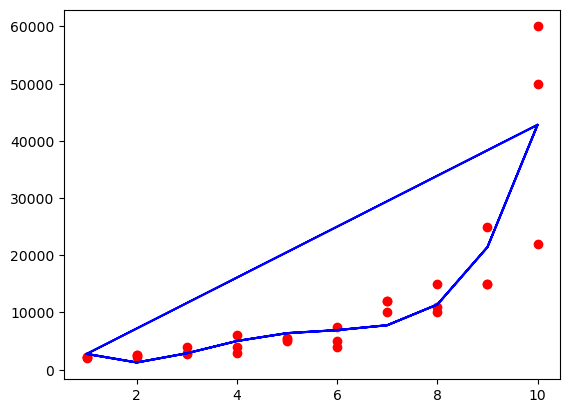

[[29296.66666667]]
[[14548.66666667]]
[[7266.19213675]]
[[81686.1111111]]
Polynomial R2 degeri
0.8174873280442541
SVR OLS
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              97.19
Date:                Wed, 19 Apr 2023   Prob (F-statistic):                    9.11e-11
Time:                        15:51:27   Log-Likelihood:                         -1.3680
No. Observations:                  30   AIC:                                      4.736
Df Residuals:                      29   BIC:                                      6.137
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                 

In [19]:
# YÖNTEM BAŞARILARIN KARŞILAŞTIRMA ÖDEVİ 
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import statsmodels.api as sm
# veri yukleme
veriler = pd.read_csv('maaslar_yeni.csv')

## x = veriler.iloc[:,2:5] ## gereksizler çıkarıp ilgilileri aldık.
x = veriler.iloc[:,2:3] ## baktık tek kolonla daha iyi bulduk 
y = veriler.iloc[:,5:]
X = x.values
Y = y.values
print(veriler.corr())

#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

model=sm.OLS(lin_reg.predict(X),X)
print(model.fit().summary())

print('Linear R2 degeri')
print(r2_score(Y, lin_reg.predict(X)))

print("\n ----------------- POLYNOMIAL REGRESSION -----------")
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()

#tahminler

print(lin_reg.predict([[11]]))
print(lin_reg.predict([[6.6]]))

print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))
print(lin_reg2.predict(poly_reg.fit_transform([[11]])))

print('Polynomial R2 degeri')
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))

#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_olcekli = sc1.fit_transform(X)
sc2=StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))


from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)


print('SVR OLS')
model3=sm.OLS(svr_reg.predict(x_olcekli),x_olcekli)
print(model3.fit().summary())


print('SVR R2 degeri')
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))

#Decision Tree Regresyon
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)


print('Decision Tree OLS')
model4=sm.OLS(r_dt.predict(X),X)
print(model4.fit().summary())

print('Decision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))

#Random Forest Regresyonu
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())



print('Random Forest OLS')
model5=sm.OLS(rf_reg.predict(X),X)
print(model5.fit().summary())



print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))


#Ozet R2 değerleri
print('-----------------------')
print('Linear R2 degeri')
print(r2_score(Y, lin_reg.predict(X)))

print('Polynomial R2 degeri')
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))

print('SVR R2 degeri')
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))


print('Decision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))

print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))





# ÖZET

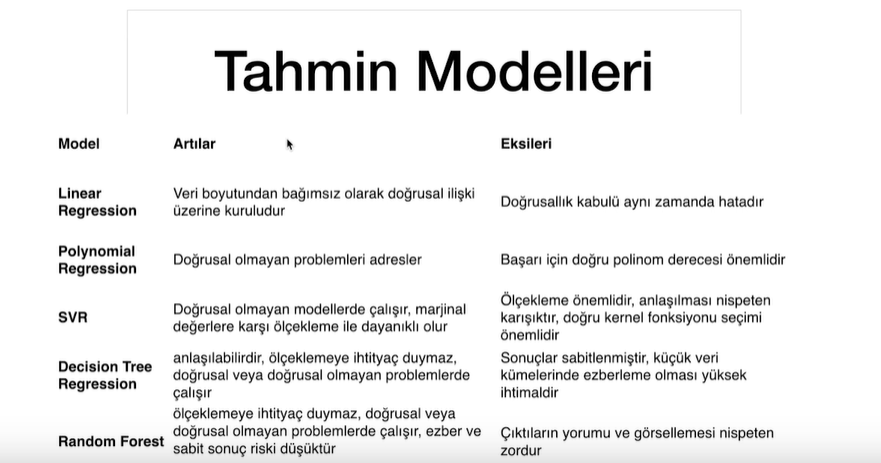